<center>
<table style="border:none">
    <tr style="border:none">
    <th style="border:none">
        <a  href='https://colab.research.google.com/github/AmirMardan/ml_course/blob/main/5_data_analysis_processing/3_data_transform.ipynb'><img src='https://colab.research.google.com/assets/colab-badge.svg'></a>
    </th>
    <th style="border:none">
        <a  href='https://github1s.com/AmirMardan/ml_course/blob/main/5_data_analysis_processing/3_data_transform.ipynb'><img src='../imgs/open_vscode.svg' height=20px width=115px></a>
    </th>
    </tr>
</table>
</center>


This notebook is created by <a href='https://github.com/AmirMardan'> Amir Mardan</a>. For any feedback or suggestion, please contact me via <a href="mailto:mardan.amir.h@gmail.com">email</a>, (mardan.amir.h@gmail.com).



<a name='top'></a>
# Data Transformation

Data transformation consists of all operations we need to carry out to change the variables or create new ones.
In this notebook, we learn how to
- Scale and normalize numerical data
- Encode the categorical data
- Change the distribution of numerical data


This notebook will cover the following topics:
- [1. Import packages and dataset](#import)
- [2. Scaling numerical data](#scale)
    - [Data normalization](#normalization)
    - [Data standardization](#satandardization)
    - [Robust scaling](#rscaling)
- [3. Encode categorical data](#encoding)
    - [Ordinal Encoding](#ordinal)
    - [One Hot Encoding](#onehot)
    - [Dummy Encoding](#dummy)
- [4. How to make distribution more Gaussian](#gaussian)
    - [Box-Cox transform](#box_cox)
    - [Yeo-Johnson transform](#yeo_johnson)
    - [Quantile transform](#quantile)


<a id='import'></a>
## 1. Import packages and dataset

In [200]:
import pandas as pd
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set_theme()
pd.options.mode.chained_assignment = None 

In [201]:
house = pd.read_csv('../data/all_Cities.csv')

In [202]:
house.head(2)

,seller_type,bedroom,layout_type,property_type,locality,price,area,furnish_type,bathroom,city
0,OWNER,2.0,BHK,Apartment,Bodakdev,20000.0,1450.0,Furnished,2.0,Ahmedabad
1,OWNER,1.0,RK,Studio Apartment,CG Road,7350.0,210.0,Semi-Furnished,1.0,Ahmedabad


In [203]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193011 entries, 0 to 193010
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   seller_type    193011 non-null  object 
 1   bedroom        193011 non-null  float64
 2   layout_type    193011 non-null  object 
 3   property_type  193011 non-null  object 
 4   locality       193011 non-null  object 
 5   price          193011 non-null  float64
 6   area           193011 non-null  float64
 7   furnish_type   193011 non-null  object 
 8   bathroom       193011 non-null  float64
 9   city           193011 non-null  object 
dtypes: float64(4), object(6)
memory usage: 14.7+ MB


In [204]:
house[['bedroom', 'bathroom']] = house[['bedroom', 'bathroom']].astype(np.int32)

In [205]:
house_num = house.select_dtypes(['float64'])
house_cat = house.select_dtypes(['object'])
house_cat.drop(columns='locality', inplace=True)

house_num.head(2)

,price,area
0,20000.0,1450.0
1,7350.0,210.0


<a id='scale'></a>
## 2. Scaling numerical data

Machine learning algorithms can perform better when numerical inputs have a standard range. 
Except for decision trees, most algorithms expect scaled features.
Here we learn about three types of scaling:
- Normalization
- Standardization
- Robust scaler

> One of the most common forms of pre-processing consists of a simple linear rescaling of the input variables.

<a name='normalization'></a>
### 2.1 Data Normalization 

Data normalization is bringing the data from its original range to a new range of 0 to 1.

$ 
y = \frac{x - \mathbf{x}_{min}}{\mathbf{x}_{max} - \mathbf{x}_{min}}
$

Normalization is used when features have different ranges of value and units. 
For example, you might have two features where the range of one is 0 - 0.5 while the other one has a range of 800 - 2000.
Surely, you insert lots of bias into your model without scaling the dataset.

If the variable has a Gaussian distribution, it's better to use standardization.

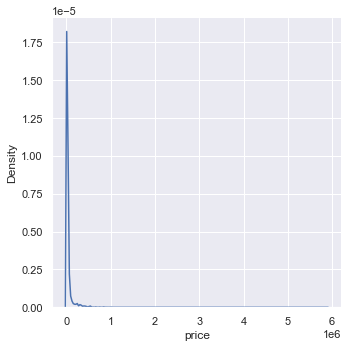

In [155]:
sns.displot(data=house_num, x='price', kind='kde')

In [156]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
house_num_norm = pd.DataFrame(scaler.fit_transform(house_num),
                          columns=house_num.columns)

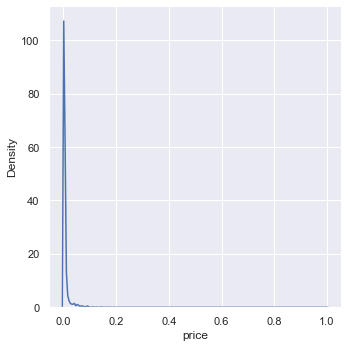

In [157]:
sns.displot(data=house_num_norm, x='price', kind='kde')

<a name='satandardization'></a>
### 2.2 Data Standardization 

Standardizing a variable rescales the distribution of values so that the mean of observed values is 0 and the standard deviation is 1.

A variable with $N$ observations can be standardized as,

$
y = \frac{x - \mathbf{x}_{mean}}{\mathbf{x}_{std}},
$

where

$
x_{mean} = \frac{1}{N} \sum_{i=1}^{N} \mathbf{x}_i,
$

and 
$
x_{std} = \sqrt{\frac{\sum_{i=1}^{N} (\mathbf{x}_i - \mathbf{x}_{mean})^2}{N - 1}} 
$

This method assumes that the variable has a Gaussian distribution.

In [158]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
house_num_sscale = pd.DataFrame(scaler.fit_transform(house_num),
                          columns=house_num.columns)


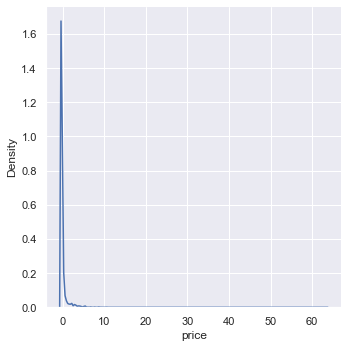

In [159]:
sns.displot(data=house_num_sscale, x='price', kind='kde')

In [160]:
print('Original(mean: {}, std: {})'.format(house_num['price'].mean(), house_num['price'].std()))
print('Normalized(mean: {}, std: {})'.format(house_num_norm['price'].mean(), house_num_norm['price'].std()))
print('Standardized(mean: {}, std: {})'.format(house_num_sscale['price'].mean(), house_num_sscale['price'].std()))

Original(mean: 44336.5373061639, std: 91951.99033392587)
Normalized(mean: 0.007331407815725195, std: 0.01562799387027531)
Standardized(mean: 8.24624362395213e-18, std: 1.0000025905359948)


<a name='rscaling'></a>
### 2.3 Robust Scaling

Robust scaling is similar to standardization, but it's a more suitable method when there are lots of outliers in the data.
This scaler removes the median and scales the data according to the quantile range.

$ 
y = \frac{x - \mathbf{x}_{median}}{\mathbf{x}_{q75} - \mathbf{x}_{q25}}
$


In [161]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler(quantile_range=(25.0, 75.0))
house_num_rscale = pd.DataFrame(scaler.fit_transform(house_num),
                                 columns=house_num.columns)


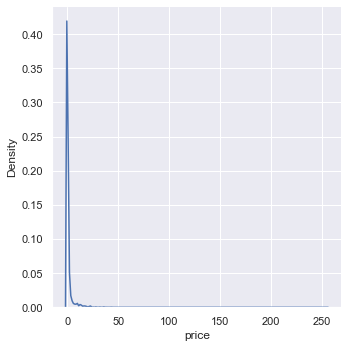

In [162]:
sns.displot(data=house_num_rscale, x='price', kind='kde')

In [163]:
def print_info(df, title):
    print(f"{title} \n(mean: {np.round(df['price'].mean(), 2)}, std: {np.round(df['price'].std(), 2)},"
      f" median: {np.round(df['price'].median(), 2)})")

print_info(house_num, 'Original') 
print_info(house_num_norm, 'Normalized') 
print_info(house_num_sscale, 'Standardized') 
print_info(house_num_rscale, 'Robust scaling')  


Original 
(mean: 44336.54, std: 91951.99, median: 21000.0)
Normalized 
(mean: 0.01, std: 0.02, median: 0.0)
Standardized 
(mean: 0.0, std: 1.0, median: -0.25)
Robust scaling 
(mean: 1.01, std: 4.0, median: 0.0)


Robust scaling makes the median of the variable 0.


<a id='encoding'></a>
## 3. Encode categorical data

Machine learning models expect all input variables as numeric.
Hence, categorical data must be encoded before training and evaluation.

There are two most important techniques for encoding the categorical variables,
- Ordinal Encoding,
- One Hot Encoding,
- Dummy Variable Encoding.

Here, we see these methods.

Before going further, we should know that there are two types of categorical data,
- **Nominal variables**: Variables including values without a rank-order relationship between them
- **Ordinal variables**: Variables including values with a rank-order relationship between them. 


<a id='ordinal'></a>
### 3.1 Ordinal Encoding

In [164]:
house_cat.head(3)

,seller_type,layout_type,property_type,furnish_type,city
0,OWNER,BHK,Apartment,Furnished,Ahmedabad
1,OWNER,RK,Studio Apartment,Semi-Furnished,Ahmedabad
2,OWNER,BHK,Apartment,Unfurnished,Ahmedabad


In [165]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder(dtype=np.int32)
house_cat_odinal = encoder.fit_transform(house_cat)

This method return numpy array and for easy manipulation, I convert it to pandas DataFrame.

In [166]:
house_cat_odinal = pd.DataFrame(house_cat_odinal,
                                 columns=house_cat.columns)

house_cat_odinal.head(3)

,seller_type,layout_type,property_type,furnish_type,city
0,2,0,0,0,0
1,2,1,4,1,0
2,2,0,0,2,0


We can access to the category of each column using 
```
encoder.category_
```

In [167]:
encoder.categories_

[array(['AGENT', 'BUILDER', 'OWNER'], dtype=object),
 array(['BHK', 'RK'], dtype=object),
 array(['Apartment', 'Independent Floor', 'Independent House', 'Penthouse',
        'Studio Apartment', 'Villa'], dtype=object),
 array(['Furnished', 'Semi-Furnished', 'Unfurnished'], dtype=object),
 array(['Ahmedabad', 'Bangalore', 'Chennai', 'Delhi', 'Hyderabad',
        'Kolkata', 'Mumbai', 'Pune'], dtype=object)]

<div class="alert alert-block alert-danger">
<b>Warning:</b> Ordinary encoder can't handle missing values.
</div>

<a id='onehot'></a>
### 3.2 One Hot Encoding

Using Ordinal encoding for nominal variables can result in poor performance. 
For this type of data, a one-hot encoding should be used.

In [168]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(dtype=np.int32)
house_cat_hot = encoder.fit_transform(house_cat)


The output of OneHotEncoder is a sparse matrix and we need to convert it to the form we want.

In [169]:
house_cat_hot.toarray()

array([[0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 1, ..., 0, 0, 1],
       [1, 0, 0, ..., 0, 0, 1],
       [1, 0, 0, ..., 0, 0, 1]], dtype=int32)

In [170]:
encoder.categories_

[array(['AGENT', 'BUILDER', 'OWNER'], dtype=object),
 array(['BHK', 'RK'], dtype=object),
 array(['Apartment', 'Independent Floor', 'Independent House', 'Penthouse',
        'Studio Apartment', 'Villa'], dtype=object),
 array(['Furnished', 'Semi-Furnished', 'Unfurnished'], dtype=object),
 array(['Ahmedabad', 'Bangalore', 'Chennai', 'Delhi', 'Hyderabad',
        'Kolkata', 'Mumbai', 'Pune'], dtype=object)]

For example, if we want to transform the feature `seller_type`, we should:

1. Get all categories of this feature

In [171]:
columns = encoder.categories_[0]
columns

array(['AGENT', 'BUILDER', 'OWNER'], dtype=object)

2. Make a DataFrame using those classes and corresponding values.

In [172]:
seller_type = pd.DataFrame(house_cat_hot.toarray()[:, :3], 
                           columns= columns)

seller_type.head()

,AGENT,BUILDER,OWNER
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1


3. Drop the categorical feature from the original DataFrame and add the encoded features to the DataFrame.

In [173]:
house_cat_encoded = house_cat.copy()

house_cat_encoded.drop(columns='seller_type', inplace=True)
house_cat_encoded[seller_type.columns] = seller_type

house_cat_encoded.head()

,layout_type,property_type,furnish_type,city,AGENT,BUILDER,OWNER
0,BHK,Apartment,Furnished,Ahmedabad,0,0,1
1,RK,Studio Apartment,Semi-Furnished,Ahmedabad,0,0,1
2,BHK,Apartment,Unfurnished,Ahmedabad,0,0,1
3,BHK,Independent House,Semi-Furnished,Ahmedabad,0,0,1
4,BHK,Independent House,Furnished,Ahmedabad,0,0,1


<a id='dummy'></a>
### 3.3 Dummy Encoding

The `OneHotEncoder` creates one binary variable for each category.
This method then includes redundancy.
For example, if we know [0, 1, 0] means *green* and [1, 0, 0] represents *red*, there is no need to have another variable for *blue*.
Using dummy encoding, this variable can be encoded as

[1, 0] &#8594; *red*

[0, 1] &#8594; *green*

[0, 0] &#8594; *blue*

>When there are C possible values of the predictor and only C − 1 dummy variables are used, the matrix inverse can be computed and the contrast method is said to be a full-rank parameterization.


In [174]:
encoder = OneHotEncoder(dtype=np.int32, # Type of output
                        drop='first',  # Drop the first category
                        sparse=False,  # Get the non-sparse variable
                        )

house_cat_dummy = encoder.fit_transform(house_cat)


In [175]:
print("Shape using one hot encoder: ", house_cat_hot.shape)
print("Shape using dummy encoder: ", house_cat_dummy.shape)


Shape using one hot encoder:  (193011, 22)
Shape using dummy encoder:  (193011, 17)


In [176]:
seller_type = pd.DataFrame(house_cat_dummy[:,:2], 
                           columns=encoder.categories_[0][1:]
                           )
seller_type.head(3)

,BUILDER,OWNER
0,0,1
1,0,1
2,0,1


In [177]:
house_cat_encoded = house_cat.copy()

house_cat_encoded.drop(columns='seller_type', inplace=True)
house_cat_encoded[seller_type.columns] = seller_type

house_cat_encoded.head()

,layout_type,property_type,furnish_type,city,BUILDER,OWNER
0,BHK,Apartment,Furnished,Ahmedabad,0,1
1,RK,Studio Apartment,Semi-Furnished,Ahmedabad,0,1
2,BHK,Apartment,Unfurnished,Ahmedabad,0,1
3,BHK,Independent House,Semi-Furnished,Ahmedabad,0,1
4,BHK,Independent House,Furnished,Ahmedabad,0,1


<a id='gaussian'></a>
## 4. How to Make Distribution More Gaussian 

Many machine learning algorithms perform better when the distribution of data is Gaussian or Gaussian-like.
Some algorithms such as linear regression and logistic regression explicitly assume the variables have a Gaussian distribution.

>Another common reason for transformations is to remove distributional skewness. An un-skewed distribution is one that is roughly symmetric. This means that the probability of falling on either side of the distribution’s mean is roughly equal.


<a id='box_cox'></a>
### 4.1 Box-Cox Transform

This method assumes the values are strictly positive. That means 0 and negative values are not supported.
So, if there are non-positive values in the data, we should scale the data first. 

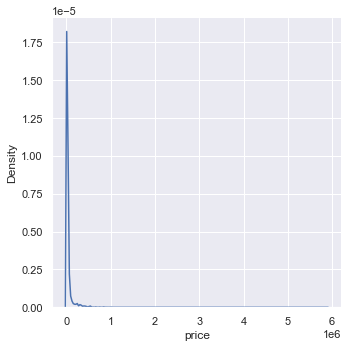

In [187]:
sns.displot(data=house_num, x='price', kind='kde')

In [188]:
from sklearn.preprocessing import PowerTransformer

transformer = PowerTransformer(method='box-cox', standardize=True)
house_num_bc = pd.DataFrame(transformer.fit_transform(house_num),
                                     columns=house_num.columns)

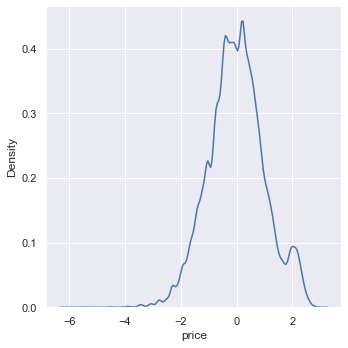

In [190]:
sns.displot(data=house_num_bc, x='price', kind='kde')

<a id='yeo_johnson'></a>
### 4.2 Yeo-Johnson Transform

This method accepts non-positive values as well.

In [191]:
transformer = PowerTransformer(method='yeo-johnson', standardize=True)
house_num_transformed = pd.DataFrame(transformer.fit_transform(house_num),
                                     columns=house_num.columns)



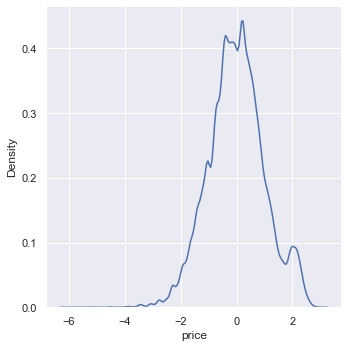

In [192]:
sns.displot(data=house_num_transformed, x='price', kind='kde')

<a id='quantile'></a>
### 4.3 Quantile Transformer

This method applies a non-linear transformation such that the probability density function of each feature will be mapped to a uniform or Gaussian distribution. In this case, all the data, including outliers, will be mapped to a uniform distribution with the range [0, 1], making outliers indistinguishable from inliers.
This method is robust to outliers.


In [196]:
from sklearn.preprocessing import QuantileTransformer

transformer = QuantileTransformer(output_distribution='normal')
house_num_quantile_nomal = pd.DataFrame(transformer.fit_transform(house_num),
                                     columns=house_num.columns)

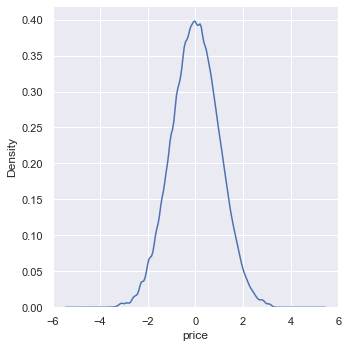

In [197]:
sns.displot(data=house_num_quantile_nomal, x='price', kind='kde')

If required, we can also get a uniform distribution using `QuantileTransformer`.

In [198]:
transformer = QuantileTransformer(output_distribution='uniform')
house_num_quantile_uniform = pd.DataFrame(transformer.fit_transform(house_num),
                                     columns=house_num.columns)

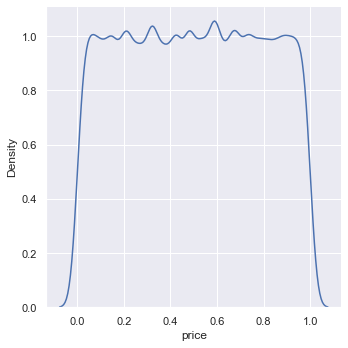

In [199]:
sns.displot(data=house_num_quantile_uniform, x='price', kind='kde')

### [TOP ☝️](#top)